In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('Occupancy_Estimation.csv')
dataset.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [5]:
dataset = dataset.drop(['Date','Time'],axis=1)

In [7]:
X = dataset.iloc[:,0:-1]
y = dataset['Room_Occupancy_Count']

In [8]:
ss = StandardScaler()
ss.fit_transform(X)

array([[-1.46303347, -1.35777517, -1.16233429, ...,  0.66446859,
        -0.31474885, -0.29402867],
       [-1.46303347, -1.35777517, -1.16233429, ...,  0.558817  ,
        -0.31474885, -0.29402867],
       [-1.29225542, -1.35777517, -1.30276354, ...,  0.4498638 ,
        -0.31474885, -0.29402867],
       ...,
       [-0.92223631, -0.82903247, -0.85807092, ...,  0.00414617,
        -0.31474885, -0.29402867],
       [-0.92223631, -0.82903247, -0.85807092, ...,  0.00414617,
        -0.31474885, -0.29402867],
       [-0.92223631, -0.82903247, -0.85807092, ...,  0.00414617,
        -0.31474885, -0.29402867]])

In [9]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [11]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [12]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

In [13]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.9 Best Kernel =  poly Best Nu =  9.62 Best Epsilon =  2.1
Best Accuracy =  0.95 Best Kernel =  linear Best Nu =  3.82 Best Epsilon =  4.57
Best Accuracy =  0.97 Best Kernel =  linear Best Nu =  5.85 Best Epsilon =  8.51
Best Accuracy =  0.92 Best Kernel =  poly Best Nu =  4.79 Best Epsilon =  1.37
Best Accuracy =  0.86 Best Kernel =  poly Best Nu =  6.63 Best Epsilon =  4.67
Best Accuracy =  0.81 Best Kernel =  sigmoid Best Nu =  5.69 Best Epsilon =  5.11
Best Accuracy =  0.87 Best Kernel =  linear Best Nu =  7.67 Best Epsilon =  9.8
Best Accuracy =  0.91 Best Kernel =  poly Best Nu =  6.99 Best Epsilon =  2.65
Best Accuracy =  0.91 Best Kernel =  poly Best Nu =  2.45 Best Epsilon =  6.31
Best Accuracy =  0.82 Best Kernel =  poly Best Nu =  0.83 Best Epsilon =  1.31


In [14]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.90,poly,9.62,2.10
1,2,0.95,linear,3.82,4.57
2,3,0.97,linear,5.85,8.51
3,4,0.92,poly,4.79,1.37
4,5,0.86,poly,6.63,4.67
5,6,0.81,sigmoid,5.69,5.11
6,7,0.87,linear,7.67,9.80
7,8,0.91,poly,6.99,2.65
8,9,0.91,poly,2.45,6.31
9,10,0.82,poly,0.83,1.31


In [15]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [16]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()],C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,train_sizes = np.linspace(0.01, 1.0, 50))

In [18]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

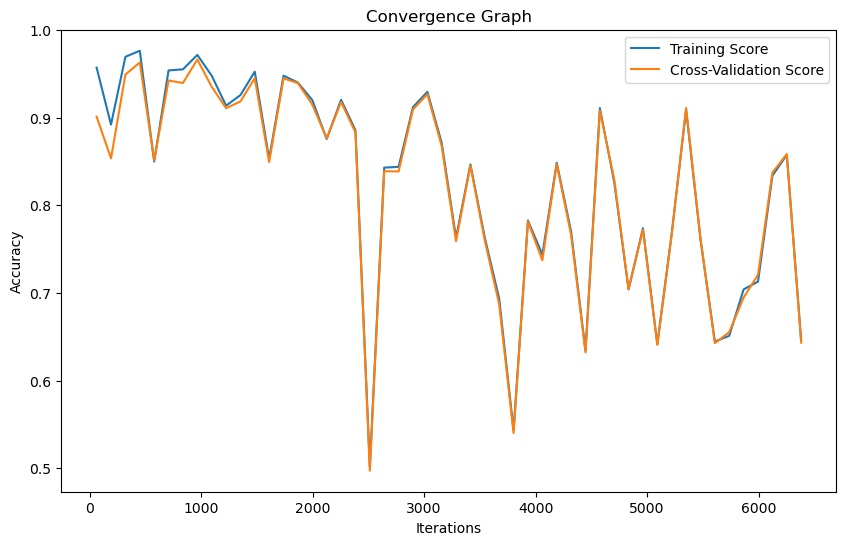

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()